In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Paso 1 

In [2]:
#Cargar data frame

df_games = pd.read_csv('/datasets/games.csv')
print(df_games)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Ot

Paso 2

In [3]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
#Cambiar columnas a minusculas

df_games.columns = [col.strip().lower() for col in df_games.columns]
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Preparar los datos

In [5]:
print(df_games.head(20))

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

In [6]:
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [7]:
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [8]:
df_games['name'] = df_games['name'].fillna('NAME NO AVAILABLE')

In [9]:
df_games['genre'] = df_games['genre'].fillna('GENRE NO AVAILABLE')

In [10]:
total_filas = len(df_games)
porcentaje_faltantes = (269 / total_filas) * 100
print(f"Porcentaje de valores faltantes: {porcentaje_faltantes:.2f}%")

Porcentaje de valores faltantes: 1.61%


In [11]:
df_games = df_games.dropna(subset=['year_of_release'])
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [12]:
df_games['critic_score'] = df_games['critic_score'].fillna(0)

In [14]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].fillna(0).astype(float)

In [15]:
df_games['rating'].sample(50)

8530        E
13070     NaN
4828        E
10587    E10+
1779        M
15805       T
15369     NaN
6279        T
14942       E
9717      NaN
15273       M
3729        E
2046      NaN
10114    E10+
6547        T
6860        E
9781        M
1234      NaN
4770        T
7264      NaN
4509        M
5983        E
6633        E
2704        M
8669        E
15605     NaN
5507        T
12484     NaN
15145     NaN
5802      NaN
5191        E
1761        M
6992      NaN
10475     NaN
14625       E
4405      NaN
10665     NaN
9007      NaN
3728     E10+
2050        M
193         T
14534    E10+
7840        T
12013     NaN
16152       E
6593        T
14000     NaN
4546      NaN
5270        T
16235     NaN
Name: rating, dtype: object

In [16]:
df_games['rating'] = df_games['rating'].fillna('RP')

In [17]:
print(df_games.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [18]:
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Conclusión: 

1.- Se llenaron los valores ausentes de las columnas "name" y "genre" con la leyenda " no available" o no disponible ya que solo eran dos valores ausentes en cada Data series.

1.-se cambió el tipo de datos en la columna  "year_of_release" de flot64 a "int" es decir a entero ya que expresa un año, ademasde que se eliminaron las filas de la misma columna ya que el porcentaje total de todo el data frame era menos del 2% por lo cual no afectaria de manera notoria al resultado final.


2.- Se llenaron los valores nulos de la columna 'critic_score' con cero para no afectar el analisis al momento de identifica
los juegos favoritos y se dejo en tipo float64 ya que contiene números con decimal.

3.- Se cambió la columna 'user_score" de "object" a "float" ya que contiene números con decimales, ademas de que se llenaron los valores faltantes con cero para no afectar el analisis de los videojuegos favoritos y se remplazaron los valores con cero, indicando que estan ausentes.

4.- Se llenaron los valores ausentes de la columna con la leyenda 'RP, es decir "rating pending", especificando que no pertenece todavia a una categoria en especifico. 





Paso 3 

EVALUACIÓN DE LOS VIDEOJUEGOS

In [19]:
#¿cuántos juegos fueron lanzados en diferentes años?
games_per_year = df_games['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


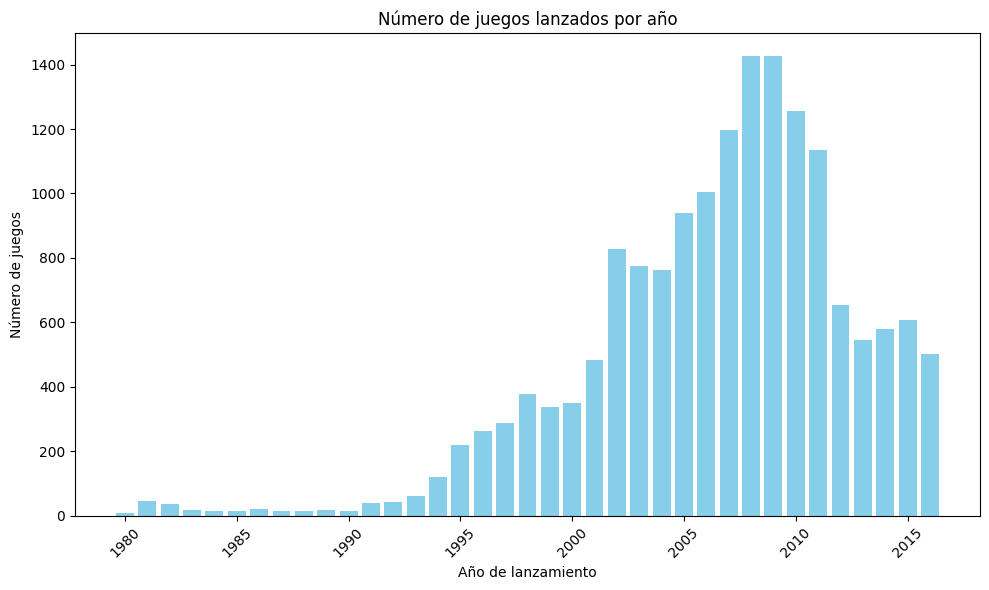

In [20]:
plt.figure(figsize=(10,6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')


plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Conclusión 

¿Son significativos los datos de cada período?

Si, ya que analizando la informacíon anterior se puede identificar que los años en donde se lanzaron más videojuegos fue entre el 2007 y el 2011. Siendo el año 2008 el año en el que más se lanzaron videojuegos con un total de 1427 juegos, habiendo una disminución muy notable al año 2016 en donde solo fueron lanzados 502.

In [22]:
#¿Cuales son las ventas totales por año para cada plataforma?

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [23]:
top_platforms = platform_sales.head(10).index


df_top_platforms = df_games[df_games['platform'].isin(top_platforms)]


sales_by_year_platform = df_top_platforms.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum', 
    fill_value=0
)

<Figure size 1400x800 with 0 Axes>

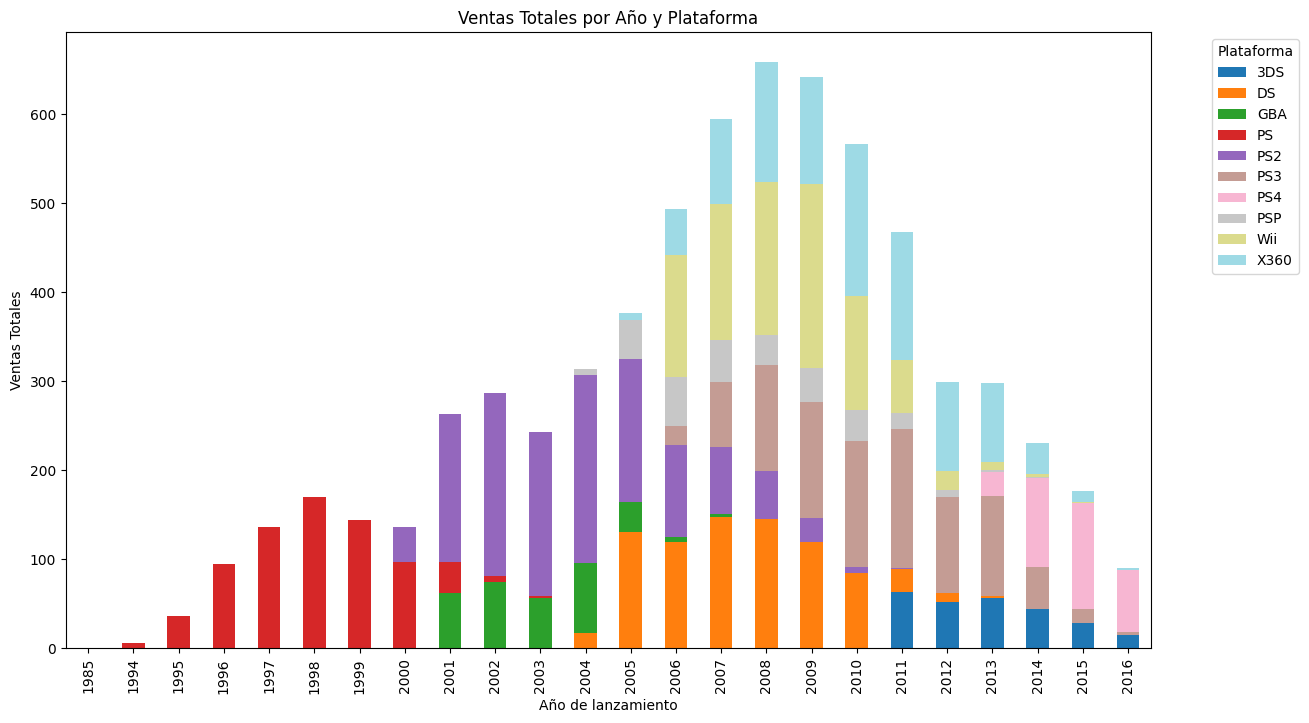

In [90]:
plt.figure(figsize=(14, 8))
sales_by_year_platform.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Ventas Totales por Año y Plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
platforms_with_declining_sales = sales_by_year_platform.columns[sales_by_year_platform.iloc[-1] == 0]


declining_sales = df_top_platforms[df_top_platforms['platform'].isin(platforms_with_declining_sales)]
declining_sales_grouped = declining_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

declining_sales_grouped.head(10)

platform
PS2    1233.56
DS      802.78
PS      727.58
GBA     312.88
PSP     289.53
Name: total_sales, dtype: float64

In [27]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

platform_life_cycle = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])


platform_life_cycle

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


In [28]:
platform_life_cycle = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life_cycle['life_span'] = platform_life_cycle['max'] - platform_life_cycle['min']


In [91]:
platform_life_cycle.describe()

,min,max,life_span
count,31.000000,31.000000,31.000000
mean,1997.645161,2005.258065,7.612903
std,9.094131,9.273503,6.998464
min,1980.000000,1989.000000,0.000000
25%,1992.500000,1996.000000,3.000000
50%,1996.000000,2007.000000,6.000000
75%,2004.500000,2016.000000,10.000000
max,2013.000000,2016.000000,31.000000


In [92]:
platform_life_cycle.mean()

min          1997.645161
max          2005.258065
life_span       7.612903
dtype: float64

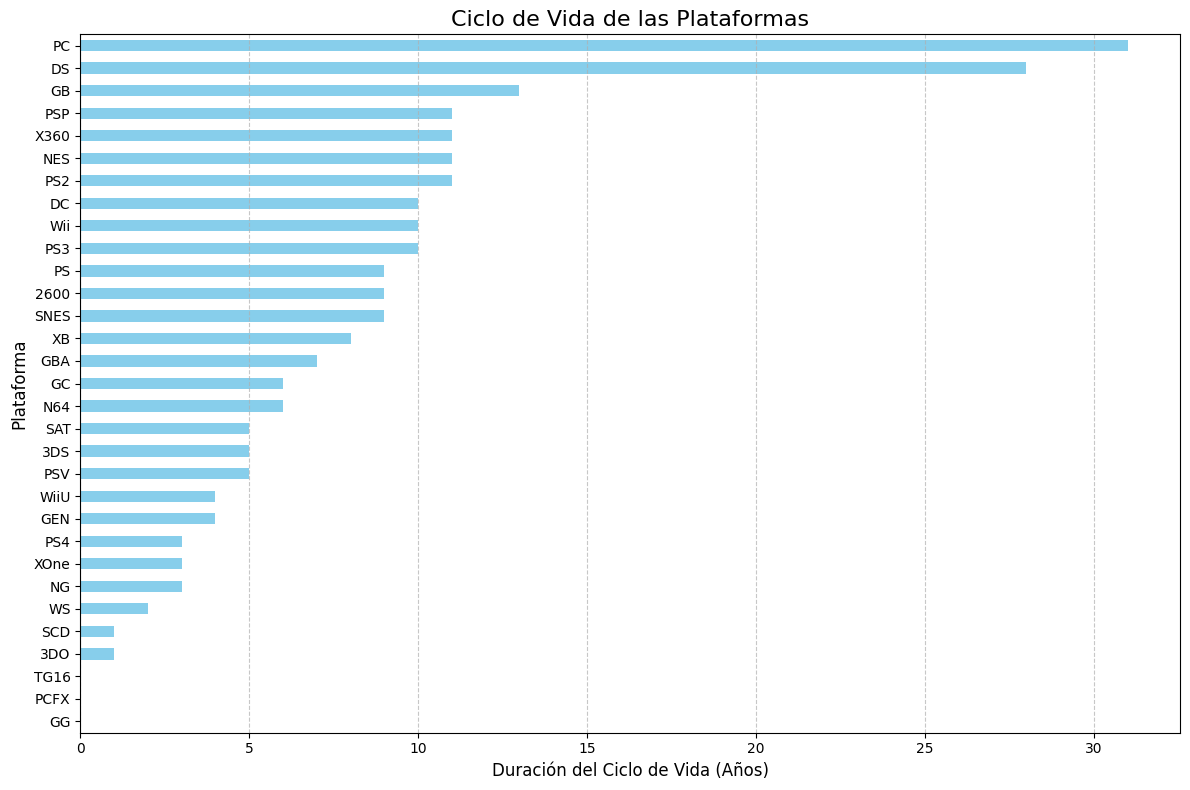

In [29]:
plt.figure(figsize=(12, 8))


platform_life_cycle['life_span'].sort_values().plot(kind='barh', color='skyblue')


plt.title('Ciclo de Vida de las Plataformas', fontsize=16)
plt.xlabel('Duración del Ciclo de Vida (Años)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

Conclusión:
    
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
    
Despues de analizar la grafica e información anterior anterior, se puede notar principalmente que la plataforma la cual ha tenido un ciclo de vida más duradero es la pc, lo cual puede influir el factor de que a los amantes de videojuegos llamados "gamers" suelen juegar más en pc que en consolas de videojuegos.

Tambien se identificó que la aparicion de las nuevas plataformas en promedio fueron lanzadas alrededor del año 1997 y que las plataformas antiguas deparacieron alrededor de 2005, dandonos un promedio de vida de las plataformas de 7.6 años.

In [32]:
#Datos para un modelo en 2017

df_filtered = df_games[df_games['year_of_release'].isin([2016, 2017])]


df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,RP,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [33]:
platform_sales_2016 = df_filtered[df_filtered['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# plataformas más populares en 2016
platform_sales_2016.head()

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
Name: total_sales, dtype: float64

In [34]:
df_train = df_filtered[df_filtered['year_of_release'] == 2016]


df_test = df_filtered[df_filtered['year_of_release'] == 2017]


df_train.head(), df_test.head()

(                               name platform  year_of_release         genre  \
 94                          FIFA 17      PS4             2016        Sports   
 108                Pokemon Sun/Moon      3DS             2016  Role-Playing   
 171      Uncharted 4: A Thief's End      PS4             2016       Shooter   
 245  Call of Duty: Infinite Warfare      PS4             2016       Shooter   
 289                   Battlefield 1      PS4             2016       Shooter   
 
      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
 94       0.66      5.75      0.08         1.11          85.0         5.0   
 108      2.98      1.45      2.26         0.45           0.0         0.0   
 171      1.85      2.50      0.19         0.85          93.0         7.9   
 245      1.61      2.00      0.15         0.71          77.0         3.4   
 289      1.10      2.15      0.21         0.61          88.0         8.4   
 
     rating  total_sales  
 94       E         7.60  


In [35]:
df_2016 = df_games[df_games['year_of_release'] == 2016]



df_top_games_2016 = df_2016.sort_values(by='total_sales', ascending=False)


df_top_games_2016[['name', 'platform', 'total_sales']].head(10)


,name,platform,total_sales
94,FIFA 17,PS4,7.60
108,Pokemon Sun/Moon,3DS,7.14
171,Uncharted 4: A Thief's End,PS4,5.39
245,Call of Duty: Infinite Warfare,PS4,4.47
289,Battlefield 1,PS4,4.07
325,Tom Clancy's The Division,PS4,3.80
571,FIFA 17,XOne,2.65
640,Call of Duty: Infinite Warfare,XOne,2.42
708,Far Cry: Primal,PS4,2.26
709,Battlefield 1,XOne,2.25


In [36]:
df_2016 = df_games[df_games['year_of_release'] == 2016]


df_top_critic_games_2016 = df_2016.sort_values(by='critic_score', ascending=False)


df_top_critic_games_2016[['name', 'platform', 'critic_score']].head(10)

,name,platform,critic_score
171,Uncharted 4: A Thief's End,PS4,93.0
9178,Odin Sphere: Leifthrasir,PSV,93.0
3771,Overwatch,PC,91.0
1948,Overwatch,XOne,91.0
1904,Forza Horizon 3,XOne,91.0
2024,NBA 2K17,XOne,90.0
16120,NBA 2K17,PC,90.0
767,Overwatch,PS4,90.0
2718,Titanfall 2,PS4,89.0
11891,Dark Souls III,PC,89.0


Conclusión:
    
Para hacer un modeló para 2017 el cual pueda servir para campañas publicitarias, se tomaron en cuenta datos de todo el año 2016 con el objetivo de que fueran más recientes. Se analizaron 3 aspectos principales los cuales fueron, la consola más popular,
el total de ventas del videojuego más popular y el videojuego con mejor puntaje de critica por los expertos.

Al hacer el analisis se obtuvo que la plataforma más popular en 2016 fue PS4, el juego más popular en ventas fue el FIFA 17 para PS4 y el juego con mayor puntuación por los expertos fue el "Uncharted 4: A Thief's End	PS4" Disponible en PS4.

Por lo mencionado anteriormente, podemos notar que tanto la consola como los juegos más populares tanto en ventas como en 
ranking de preferencia por los usuarios pertenecen todos a PS4.


In [37]:
#¿Qué plataformas son líderes en ventas? 

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Plataformas líderes en ventas:")
print(platform_sales.head(10))

Plataformas líderes en ventas:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


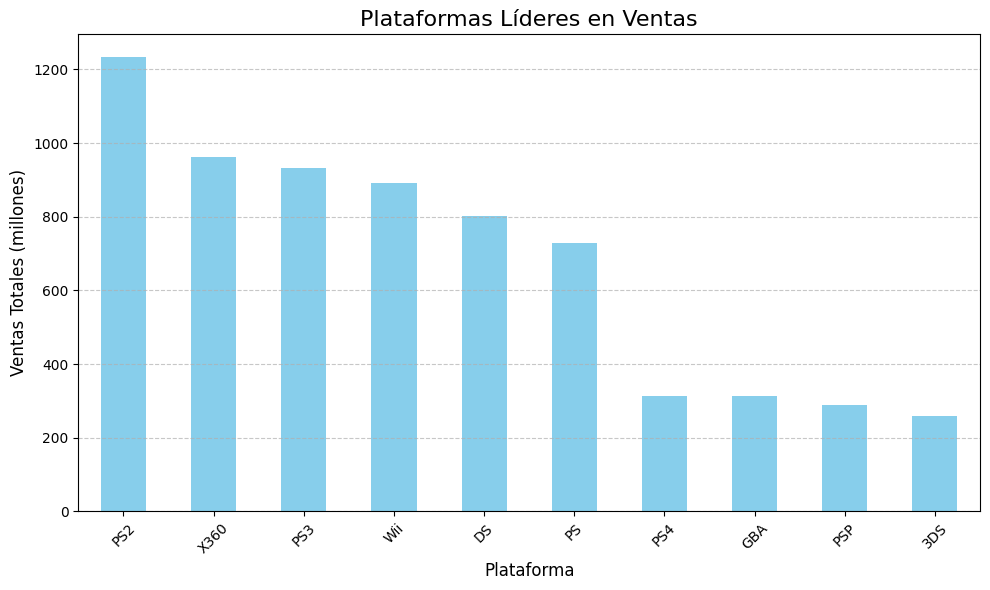

In [38]:
plt.figure(figsize=(10, 6))
platform_sales.head(10).plot(kind='bar', color='skyblue')


plt.title('Plataformas Líderes en Ventas', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

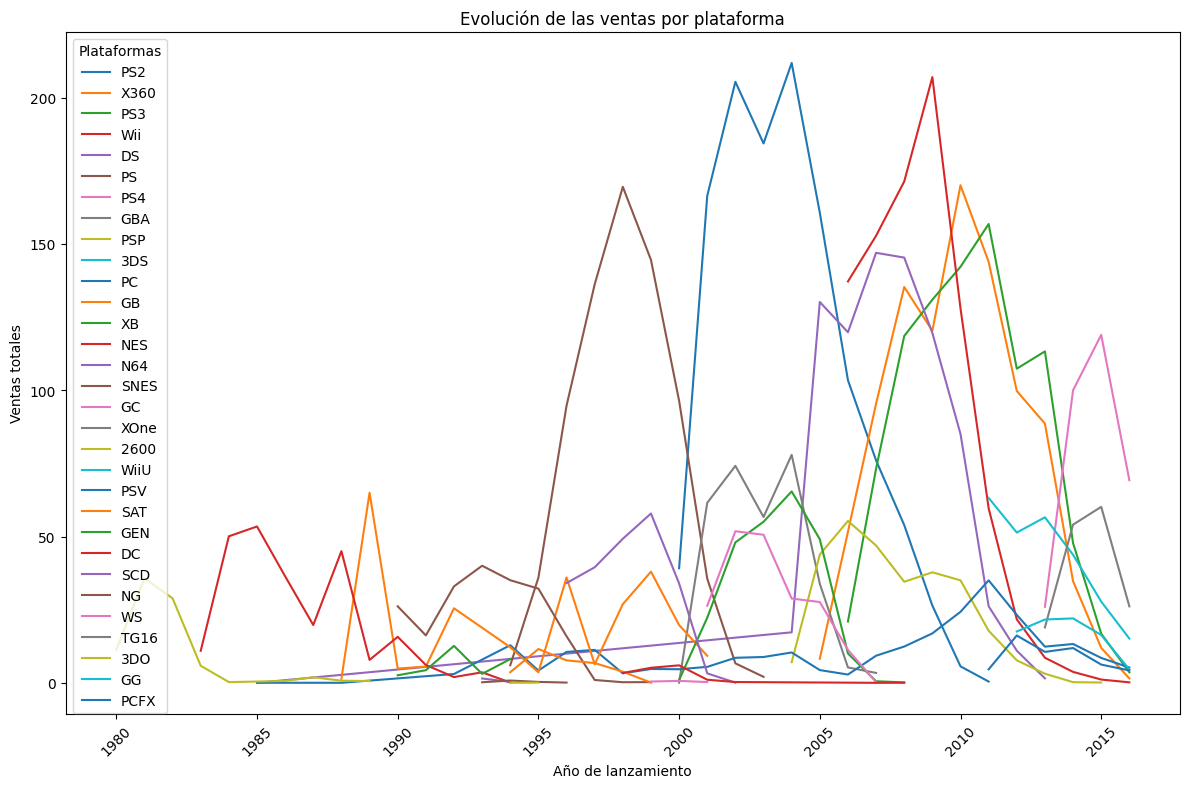

In [39]:
plt.figure(figsize=(12, 8))

for platform in platform_sales.index:
    platform_data = df_games[df_games['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, label=platform)


plt.title('Evolución de las ventas por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend(title='Plataformas')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
platform_year_sales = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

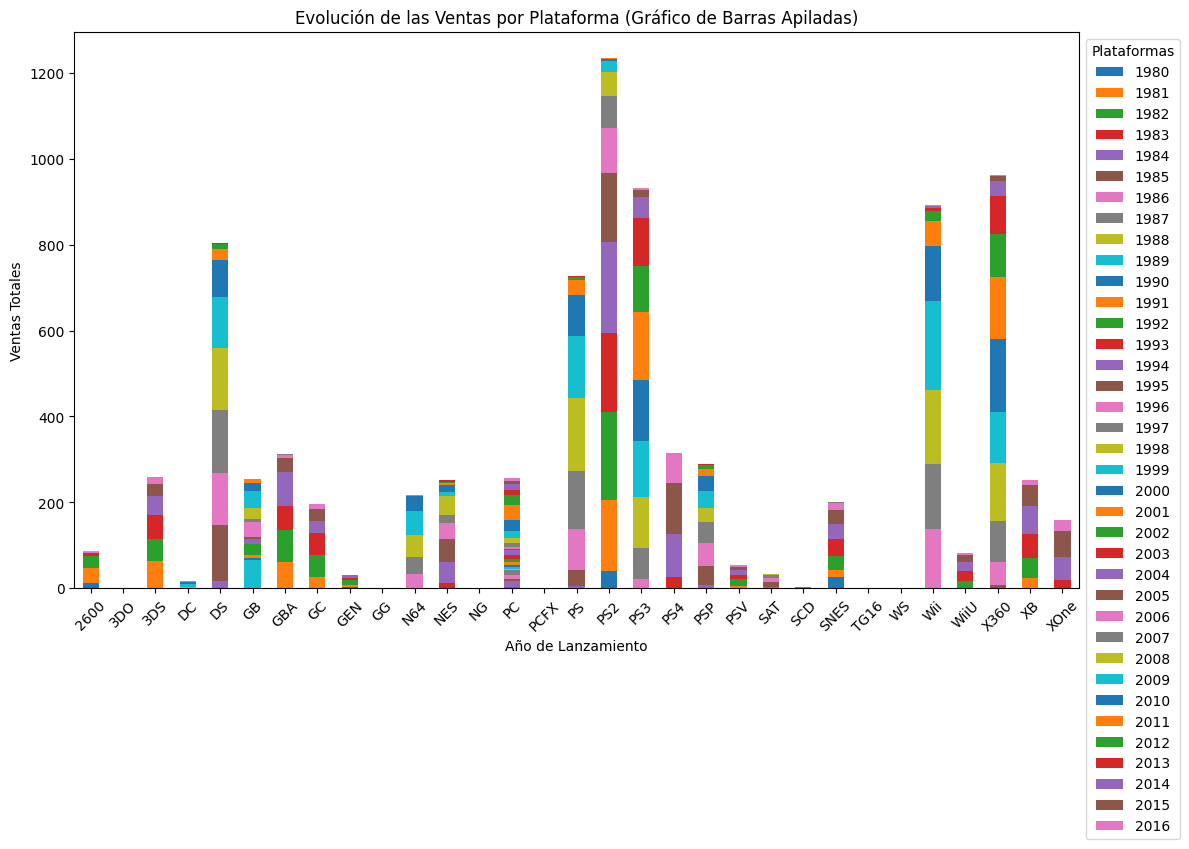

In [106]:
platform_year_sales.plot(kind='bar', stacked=True, figsize=(12, 8))


plt.title('Evolución de las Ventas por Plataforma (Gráfico de Barras Apiladas)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)

plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

In [41]:
#¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

recent_sales = df_games[df_games['year_of_release'] >= 2015]  
recent_platform_sales = recent_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


print("Plataformas potencialmente rentables (últimos años):")
print(recent_platform_sales.head(10))

Plataformas potencialmente rentables (últimos años):
platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64


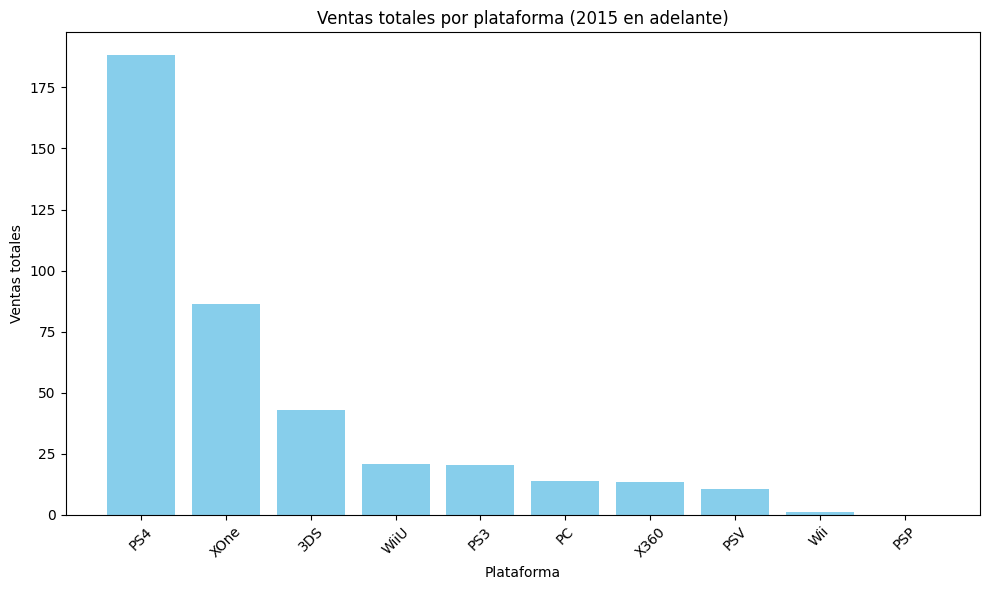

In [42]:
recent_sales = df_games[df_games['year_of_release'] >= 2015]
recent_platform_sales = recent_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,6))
plt.bar(recent_platform_sales.index, recent_platform_sales.values, color='skyblue')


plt.title('Ventas totales por plataforma (2015 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Conclusión:

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Al analizar las ventas generales (de todos los años) del data frame las 3 plataformas lideres en ventas son el PS2, XBOX360 Y PS3.
Sin embargo, al analizar información más reciente de los ultimos dos años, es decir de 2015 y 2016 se puede notar el cambio y las 
plataformas con más ventas fueron PS4, XBOXONE Y 3DS.

Por lo anterior, se puede notar que el Play station se mantiene en primer lugar solo que con la versión 4 de la plataforma, es
decir, que sigue en el gusto de los usuarios y sigue siendo la plataforma favorita al momento de analizar el data frame y es la más rentable en todos los aspectos analizados al momento, seguidos por el XBOX one y 3DS que aumentaron sus ventas en los dos ultimos años.
    
    

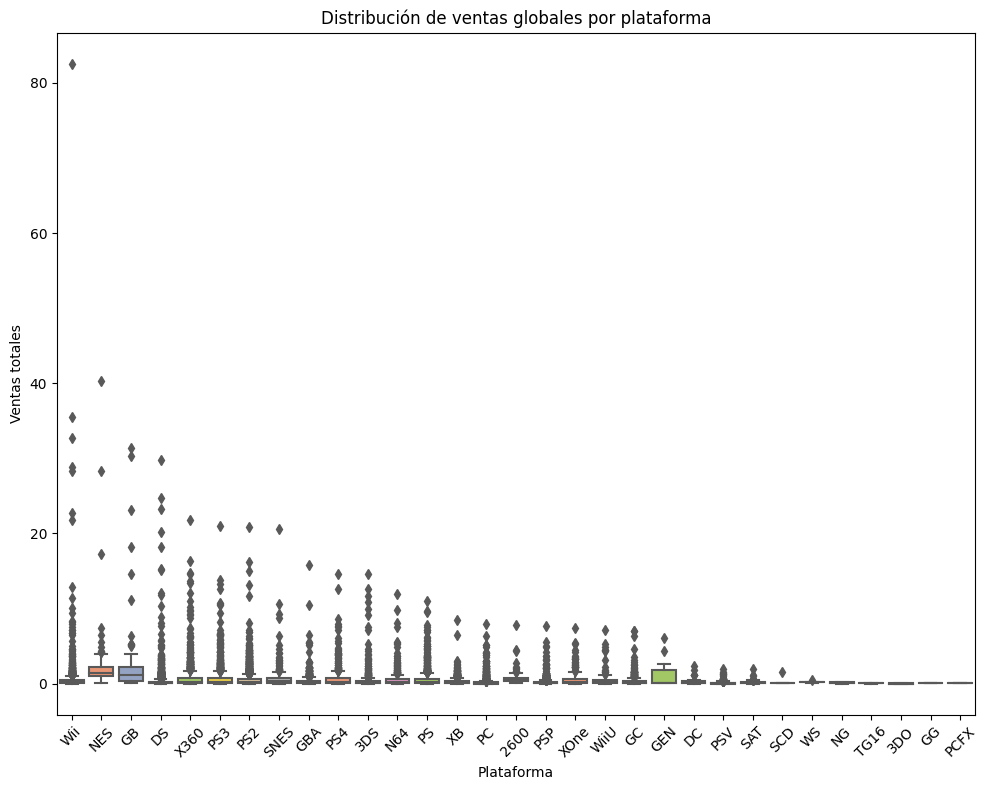

In [88]:
#Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_games, x='platform', y='total_sales', palette='Set2')


plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')


plt.xticks(rotation=45)
plt.tight_layout()



plt.show()

Conclusión:  ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

Si, como se puede notar el diagrama de caja hay diferencias muy significativas en las ventas de las plataformas como por ejemplo hay una distribución desigua, ya que hay plataformas con ventas mucho mayores que otras. Por ejemplo, plataformas como Wii, NES, GB y DS tienen valores atípicos muy altos, lo que indica que algunos juegos en estas plataformas alcanzaron ventas excepcionales.

Como segundo punto las ventas promedio, porque Aunque el diagrama no muestra directamente los promedios, la mediana de cada caja nos da una idea. Se observa que las plataformas con mayores ventas tienen una mediana más alta, pero la mayoría de las plataformas tienen ventas bajas en promedio.


Y por ultimo la dispersión de datos, es decir que algunas plataformas presentan una gran variabilidad en sus ventas (como Wii y NES), mientras que otras tienen distribuciones más compactas con valores atípicos menos pronunciados.




In [45]:
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

df_playstation = df_games[df_games['platform'] == 'PS4']
df_playstation_clean = df_playstation.dropna(subset=['na_sales', 'critic_score', 'user_score'])

                                                     

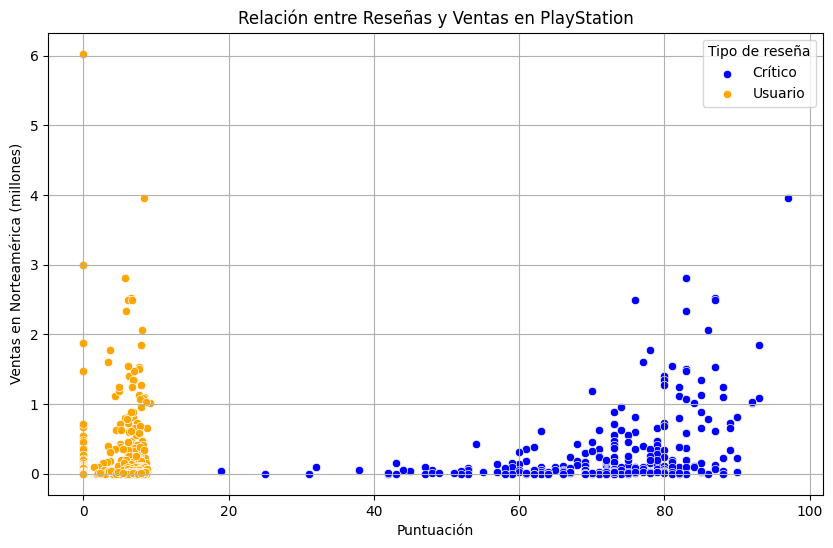

In [93]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_playstation_clean, x='critic_score', y='na_sales', label='Crítico', color='blue')
sns.scatterplot(data=df_playstation_clean, x='user_score', y='na_sales', label='Usuario', color='orange')



plt.title('Relación entre Reseñas y Ventas en PlayStation')
plt.xlabel('Puntuación')
plt.ylabel('Ventas en Norteamérica (millones)')
plt.legend(title="Tipo de reseña")
plt.grid(True)
plt.show()

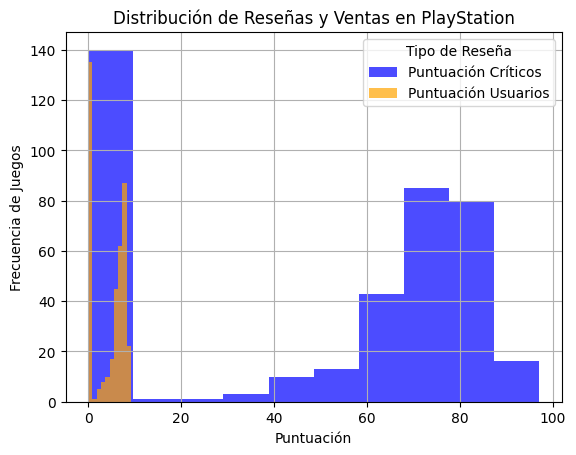

In [94]:
plt.hist(df_playstation_clean['critic_score'], bins=10, alpha=0.7, label='Puntuación Críticos', color='blue')


plt.hist(df_playstation_clean['user_score'], bins=10, alpha=0.7, label='Puntuación Usuarios', color='orange')


plt.title('Distribución de Reseñas y Ventas en PlayStation')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia de Juegos')
plt.legend(title="Tipo de Reseña")
plt.grid(True)


plt.show()

In [49]:
critic_corr = df_playstation_clean['critic_score'].corr(df_playstation_clean['na_sales'])
user_corr = df_playstation_clean['user_score'].corr(df_playstation_clean['na_sales'])

In [50]:
print(f'Correlación entre las reseñas de críticos y las ventas: {critic_corr}')
print(f'Correlación entre las reseñas de usuarios y las ventas: {user_corr}')

Correlación entre las reseñas de críticos y las ventas: 0.2173808363794422
Correlación entre las reseñas de usuarios y las ventas: 0.10993020148162864


Conclusión:


Despues de analizar la grafica de disperción y el histograma, se puede observar que hay un patrón donde juegos con mejores puntuaciones de críticos tienen mayores ventas en general, pero la dispersión indica que no es una regla absoluta.

Por ejemplo, se observa que las reseñas de los críticos (puntos azules) están distribuidas entre los valores de 50 a 100 en la puntuación, y parece haber una ligera relación positiva con las ventas en la región de NA.

Por otro lado, las reseñas de los usuarios (puntos naranjas) se agrupan mayormente en valores cercanos a 0, lo que indica que muchos juegos recibieron puntajes muy bajos por parte de los usuarios pero aún así lograron algunas ventas.

Tambien se muestra que la correlación entre las reseñas de críticos y las ventas es de 0.217, lo que indica una relación positiva débil. Esto significa que, en general, los juegos mejor calificados por los críticos tienden a vender más, pero no es un factor determinante.

Por ultimo, la correlación entre las reseñas de usuarios y las ventas es de 0.109, aún más baja, lo que indica que las opiniones de los jugadores tienen una relación aún más débil con las ventas.

In [51]:
#comparación de las ventas de los mismos juegos en otras plataformas.

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
game_platform_sales = df_games.groupby(['name', 'platform'])['total_sales'].sum().unstack(fill_value=0)


print(game_platform_sales.head())

platform                     2600  3DO   3DS   DC    DS   GB  GBA   GC  GEN  \
name                                                                          
 Beyblade Burst               0.0  0.0  0.03  0.0  0.00  0.0  0.0  0.0  0.0   
 Fire Emblem Fates            0.0  0.0  1.67  0.0  0.00  0.0  0.0  0.0  0.0   
 Frozen: Olaf's Quest         0.0  0.0  0.59  0.0  0.51  0.0  0.0  0.0  0.0   
 Haikyu!! Cross Team Match!   0.0  0.0  0.04  0.0  0.00  0.0  0.0  0.0  0.0   
 Tales of Xillia 2            0.0  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0   

platform                      GG  ...  SAT  SCD  SNES  TG16   WS  Wii  WiiU  \
name                              ...                                         
 Beyblade Burst              0.0  ...  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
 Fire Emblem Fates           0.0  ...  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
 Frozen: Olaf's Quest        0.0  ...  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
 Haikyu!! Cross Team Match!  0.0  ...  0.0  0.0   0

In [52]:
top_10_games = game_platform_sales.head(10)

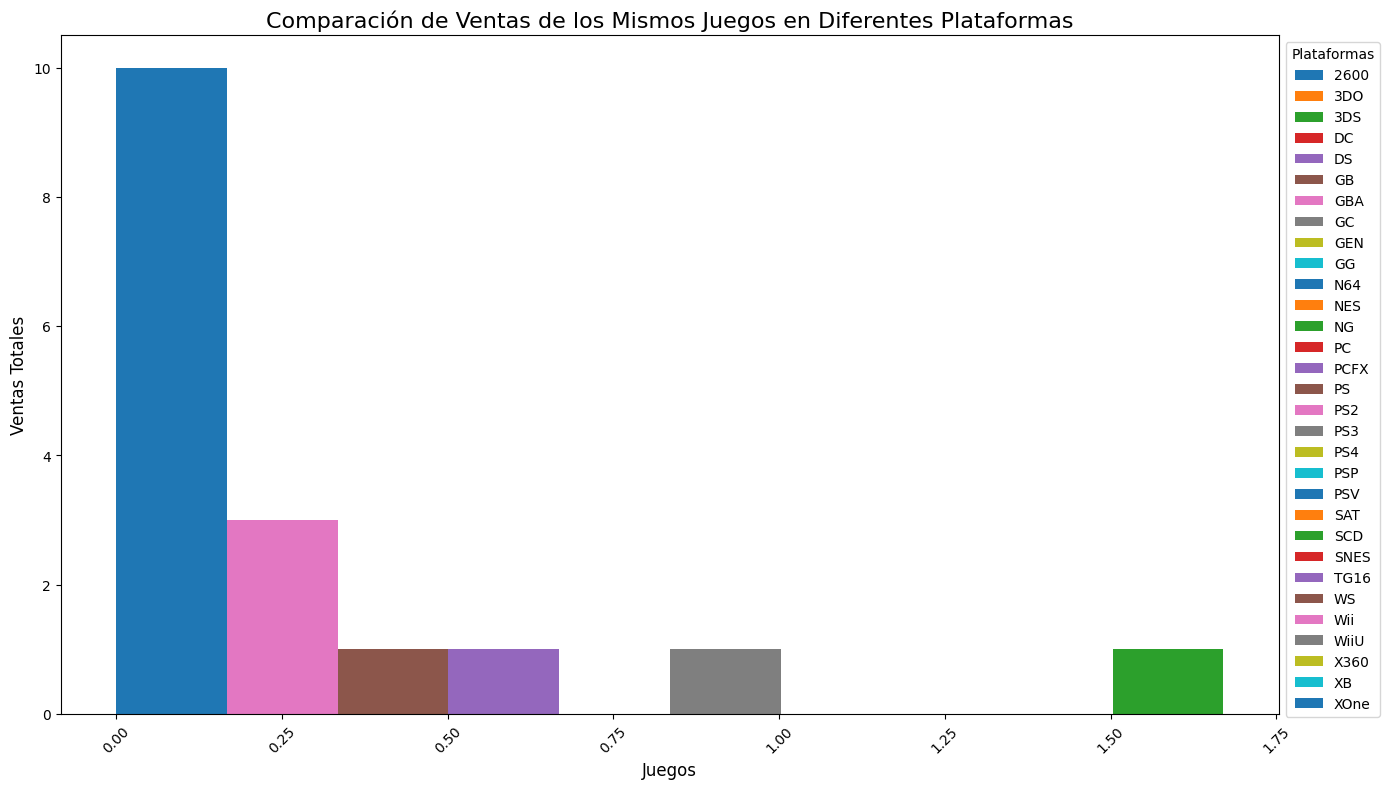

In [108]:
top_10_games.plot(kind='hist', figsize=(14, 8))

plt.title('Comparación de Ventas de los Mismos Juegos en Diferentes Plataformas', fontsize=16)
plt.xlabel('Juegos', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)


plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [56]:
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


genre_counts = df_games['genre'].value_counts()
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [57]:
print("Cantidad de juegos por género:")
print(genre_counts)

print("\nVentas totales por género:")
print(genre_sales)

Cantidad de juegos por género:
Action                3307
Sports                2306
Misc                  1721
Role-Playing          1481
Shooter               1296
Adventure             1293
Racing                1226
Platform               878
Simulation             857
Fighting               837
Strategy               673
Puzzle                 569
GENRE NO AVAILABLE       2
Name: genre, dtype: int64

Ventas totales por género:
genre
Action                1716.52
Sports                1309.67
Shooter               1041.36
Role-Playing           931.08
Platform               825.55
Misc                   790.29
Racing                 723.49
Fighting               442.66
Simulation             387.96
Puzzle                 239.89
Adventure              233.33
Strategy               172.57
GENRE NO AVAILABLE       2.42
Name: total_sales, dtype: float64


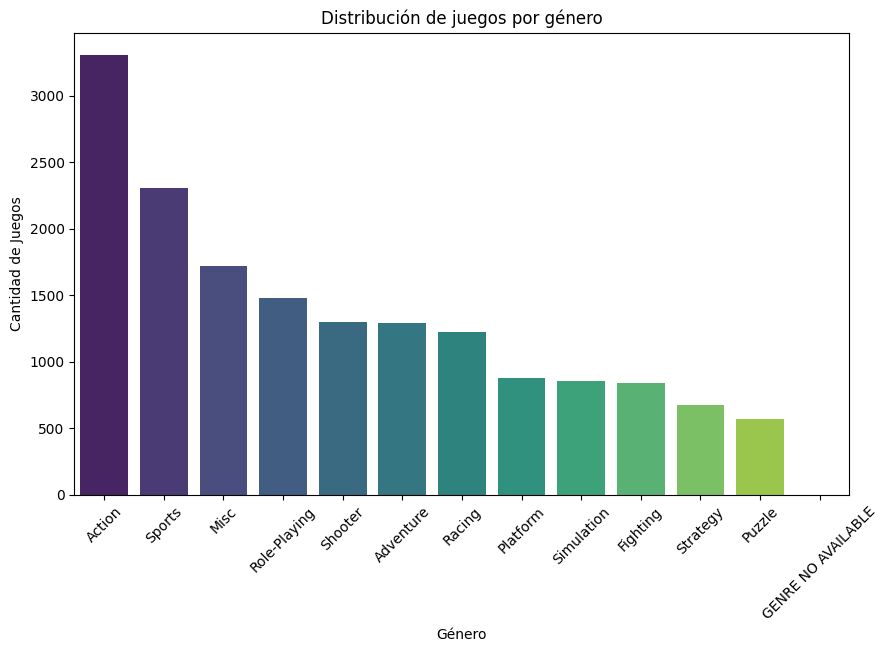

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribución de juegos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

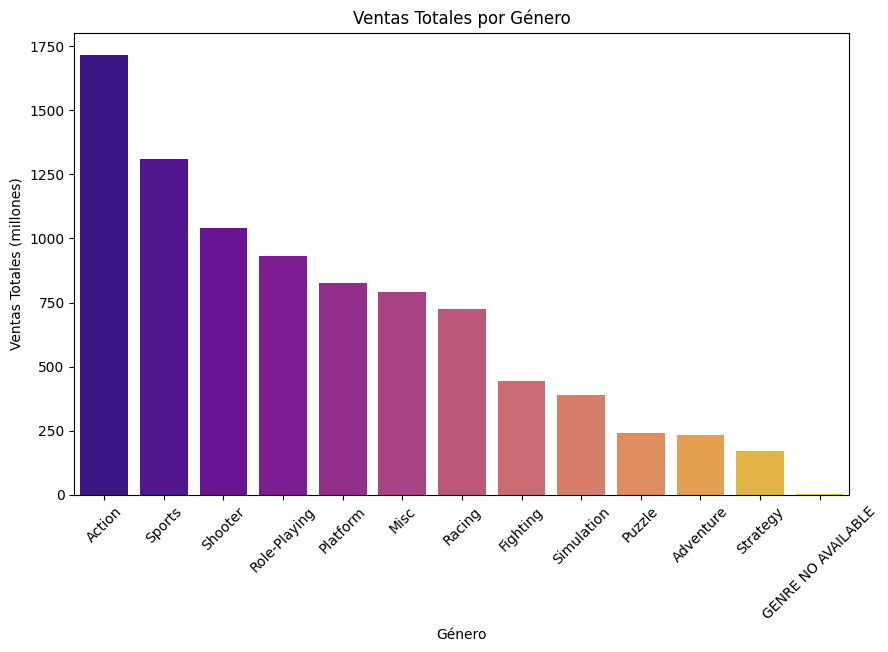

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='plasma')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

Conclusión:
    
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


Al analizar la distribución de juegos por género y las ventas totales por genero, se puede decir que si hay relación significativa y alta entre la cantidad de juegos que existen del genero y sus ventas, siendo el genero de acción el primer lugar con más juegos y ventas de ese genero, y como segundo lugar el genero de deportes que de igual forma concuerda en el número de juegos y el número de ventas totales.

Paso 4

In [61]:
#¿Cuales son las Las cinco plataformas principales en cada región (NA, UE, JP)?

def top_platforms_by_region(df, region_column):
    platform_sales = df.groupby('platform')[region_column].sum().sort_values(ascending=False).head(5)
    return platform_sales

In [62]:
top_platforms_na = top_platforms_by_region(df_games, 'na_sales')
top_platforms_eu = top_platforms_by_region(df_games, 'eu_sales')
top_platforms_jp = top_platforms_by_region(df_games, 'jp_sales')

In [63]:
print("Top 5 plataformas en NA:")
print(top_platforms_na)

print("\nTop 5 plataformas en EU:")
print(top_platforms_eu)

print("\nTop 5 plataformas en JP:")
print(top_platforms_jp)

Top 5 plataformas en NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


In [64]:
top_platforms_na = top_platforms_by_region(df_games, 'na_sales').reset_index()
top_platforms_na['region'] = 'NA'
top_platforms_na.columns = ['platform', 'sales', 'region']

top_platforms_eu = top_platforms_by_region(df_games, 'eu_sales').reset_index()
top_platforms_eu['region'] = 'EU'
top_platforms_eu.columns = ['platform', 'sales', 'region']

top_platforms_jp = top_platforms_by_region(df_games, 'jp_sales').reset_index()
top_platforms_jp['region'] = 'JP'
top_platforms_jp.columns = ['platform', 'sales', 'region']

top_platforms_all = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp])

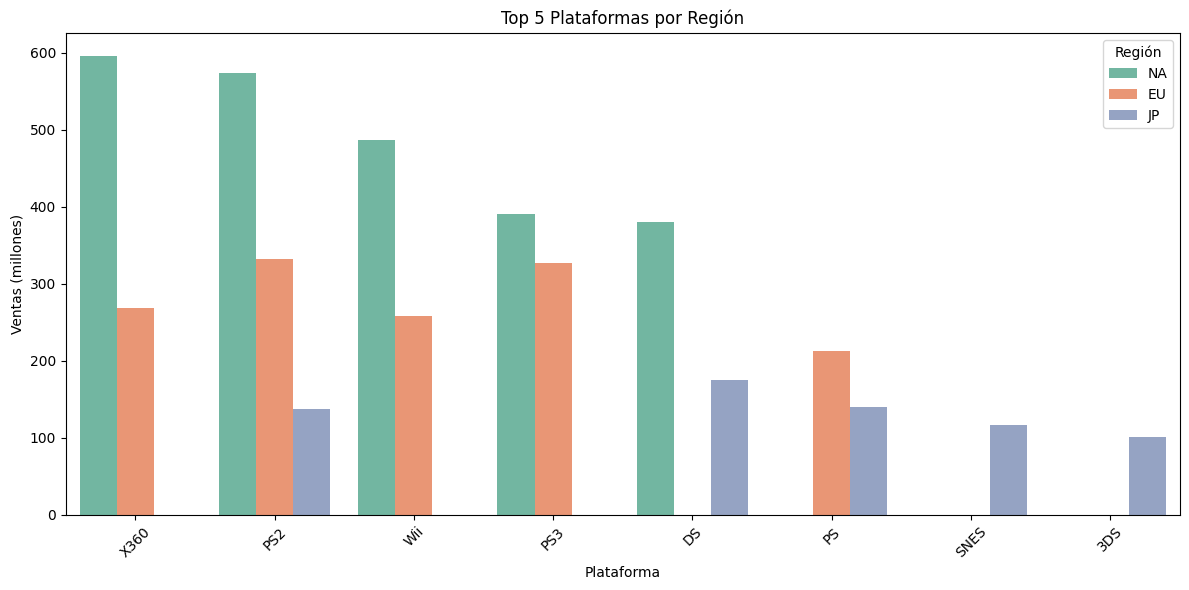

In [99]:


plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms_all, x='platform', y='sales', hue='region', palette='Set2')


plt.title('Top 5 Plataformas por Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')


plt.tight_layout()
plt.show()

In [66]:
# Variaciones en sus cuatos

def market_share(df, region_column, top_platforms):
    total_sales_region = df[region_column].sum()  # Total de ventas en la región
    platform_sales_region = df.groupby('platform')[region_column].sum()  # Ventas por plataforma
    market_share = (platform_sales_region / total_sales_region).sort_values(ascending=False)
    
    # Mostrar solo las plataformas principales
    return market_share[top_platforms.index]


In [67]:
market_share_na = market_share(df_games, 'na_sales', top_platforms_na)
market_share_eu = market_share(df_games, 'eu_sales', top_platforms_eu)
market_share_jp = market_share(df_games, 'jp_sales', top_platforms_jp)

In [68]:
print("\nCuota de mercado de plataformas en NA:")
print(market_share_na)

print("\nCuota de mercado de plataformas en EU:")
print(market_share_eu)

print("\nCuota de mercado de plataformas en JP:")
print(market_share_jp)


Cuota de mercado de plataformas en NA:
platform
X360    0.137166
PS2     0.131912
Wii     0.112099
PS3     0.089825
DS      0.087564
Name: na_sales, dtype: float64

Cuota de mercado de plataformas en EU:
platform
PS2     0.138584
PS3     0.136326
X360    0.111790
Wii     0.107624
PS      0.088488
Name: eu_sales, dtype: float64

Cuota de mercado de plataformas en JP:
platform
DS      0.135604
PS      0.108300
PS2     0.106565
SNES    0.090302
3DS     0.077960
Name: jp_sales, dtype: float64


In [69]:
market_share_na_df = market_share_na.reset_index()
market_share_na_df['region'] = 'NA'
market_share_na_df.columns = ['platform', 'market_share', 'region']

market_share_eu_df = market_share_eu.reset_index()
market_share_eu_df['region'] = 'EU'
market_share_eu_df.columns = ['platform', 'market_share', 'region']

market_share_jp_df = market_share_jp.reset_index()
market_share_jp_df['region'] = 'JP'
market_share_jp_df.columns = ['platform', 'market_share', 'region']


market_share_all = pd.concat([market_share_na_df, market_share_eu_df, market_share_jp_df])

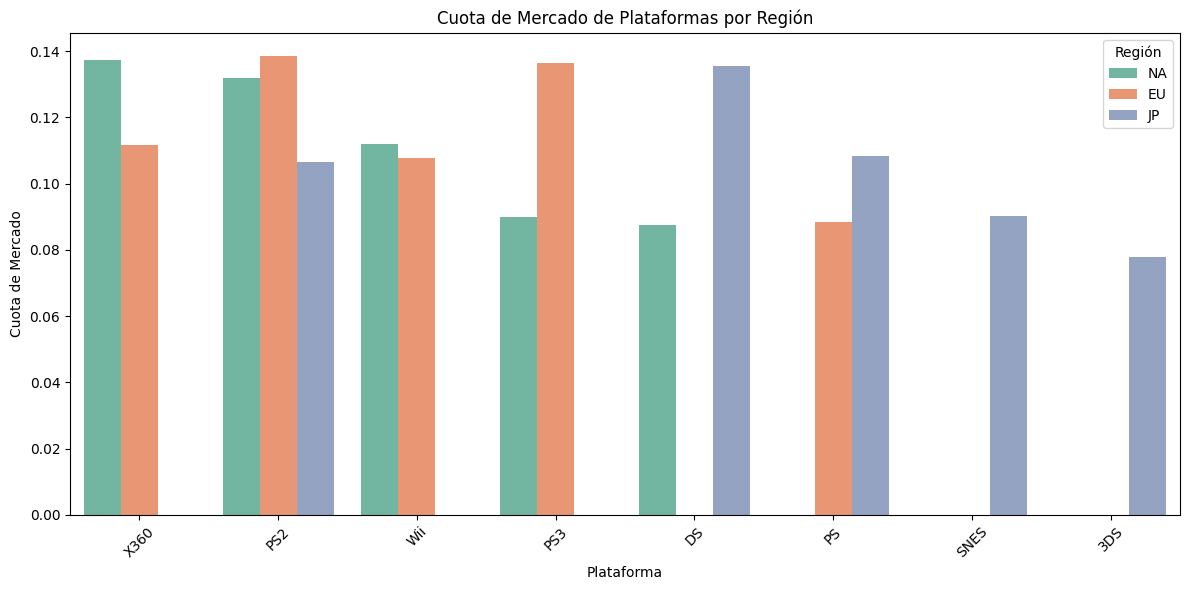

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(data=market_share_all, x='platform', y='market_share', hue='region', palette='Set2')


plt.title('Cuota de Mercado de Plataformas por Región')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de Mercado')
plt.xticks(rotation=45)
plt.legend(title='Región')


plt.tight_layout()
plt.show()

In [100]:
#¿Los cinco géneros principales?

def top_genres_by_region(df, region_column):
    genre_sales = df.groupby('genre')[region_column].sum().sort_values(ascending=False).head(5)
    return genre_sales

In [72]:
top_genres_na = top_genres_by_region(df_games, 'na_sales')
top_genres_eu = top_genres_by_region(df_games, 'eu_sales')
top_genres_jp = top_genres_by_region(df_games, 'jp_sales')

In [73]:
print("Top 5 géneros en NA:")
print(top_genres_na)

print("\nTop 5 géneros en EU:")
print(top_genres_eu)

print("\nTop 5 géneros en JP:")
print(top_genres_jp)

Top 5 géneros en NA:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 géneros en EU:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


In [74]:
top_genres_na_df = top_genres_na.reset_index()
top_genres_na_df['region'] = 'NA'
top_genres_na_df.columns = ['genre', 'sales', 'region']

top_genres_eu_df = top_genres_eu.reset_index()
top_genres_eu_df['region'] = 'EU'
top_genres_eu_df.columns = ['genre', 'sales', 'region']

top_genres_jp_df = top_genres_jp.reset_index()
top_genres_jp_df['region'] = 'JP'
top_genres_jp_df.columns = ['genre', 'sales', 'region']


top_genres_all = pd.concat([top_genres_na_df, top_genres_eu_df, top_genres_jp_df])

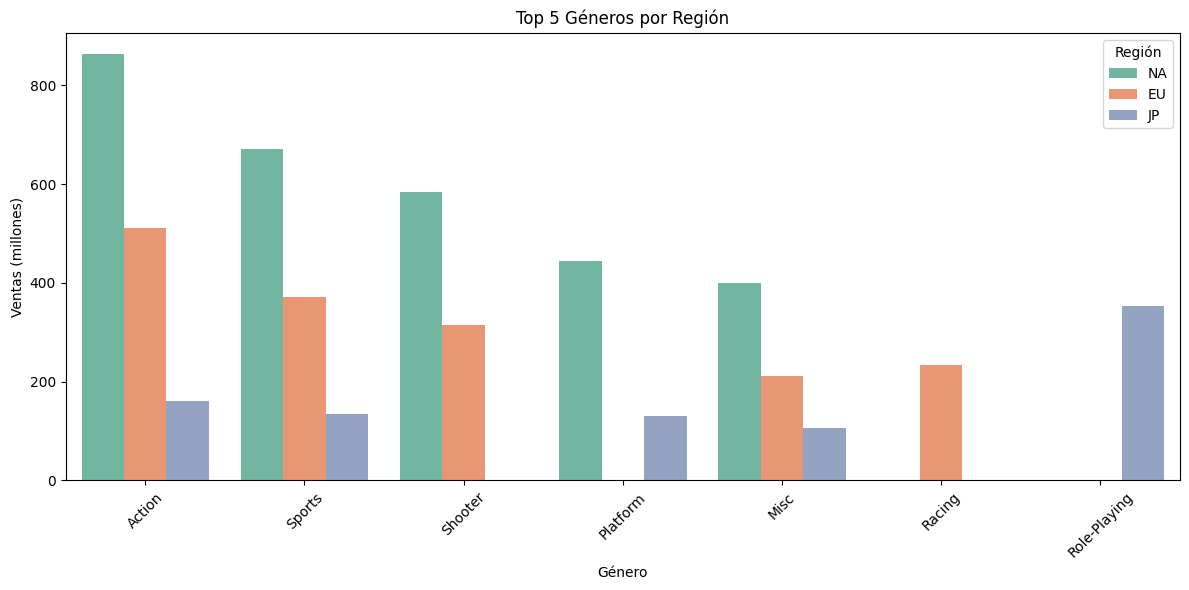

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_all, x='genre', y='sales', hue='region', palette='Set2')


plt.title('Top 5 Géneros por Región')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')


plt.tight_layout()
plt.show()

In [76]:
#¿las clasificaciones de ESRB afectan a las ventas en regiones individuales?

def sales_by_esrb(df, region_column):
    esrb_sales = df.groupby('rating')[region_column].sum().sort_values(ascending=False)
    return esrb_sales

In [77]:
esrb_sales_na = sales_by_esrb(df_games, 'na_sales')
esrb_sales_eu = sales_by_esrb(df_games, 'eu_sales')
esrb_sales_jp = sales_by_esrb(df_games, 'jp_sales')

In [78]:
print("\nVentas por clasificación ESRB en NA:")
print(esrb_sales_na)

print("\nVentas por clasificación ESRB en EU:")
print(esrb_sales_eu)

print("\nVentas por clasificación ESRB en JP:")
print(esrb_sales_jp)


Ventas por clasificación ESRB en NA:
rating
E       1274.24
RP      1227.62
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en EU:
rating
E       703.87
RP      610.21
M       480.00
T       421.79
E10+    183.35
AO        0.61
K-A       0.27
EC        0.11
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP:
rating
RP      836.77
E       197.96
T       150.70
M        63.58
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
Name: jp_sales, dtype: float64


In [79]:
esrb_sales_na_df = esrb_sales_na.reset_index()
esrb_sales_na_df['region'] = 'NA'
esrb_sales_na_df.columns = ['rating', 'sales', 'region']

esrb_sales_eu_df = esrb_sales_eu.reset_index()
esrb_sales_eu_df['region'] = 'EU'
esrb_sales_eu_df.columns = ['rating', 'sales', 'region']

esrb_sales_jp_df = esrb_sales_jp.reset_index()
esrb_sales_jp_df['region'] = 'JP'
esrb_sales_jp_df.columns = ['rating', 'sales', 'region']


esrb_sales_all = pd.concat([esrb_sales_na_df, esrb_sales_eu_df, esrb_sales_jp_df])

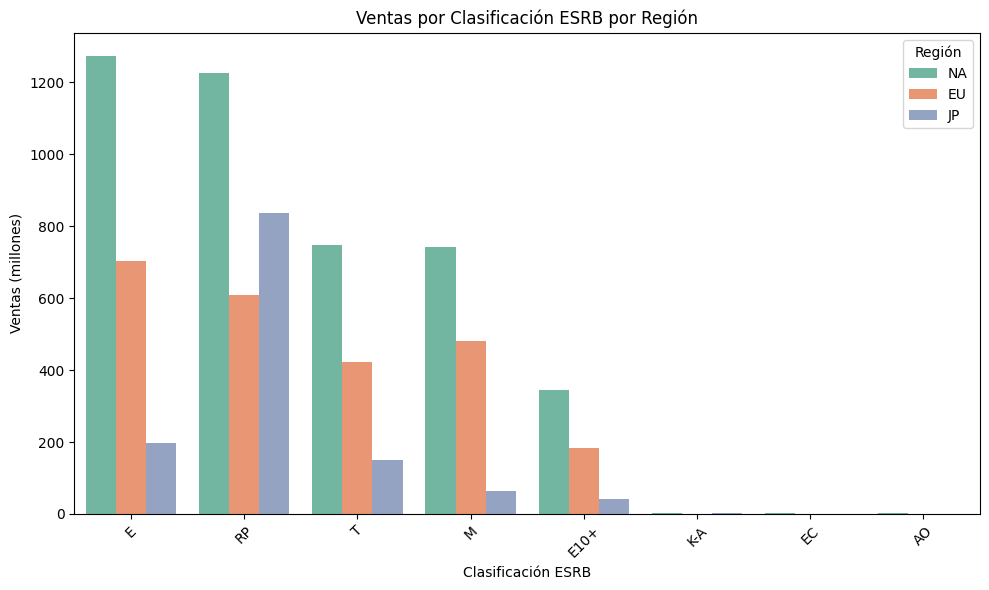

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=esrb_sales_all, x='rating', y='sales', hue='region', palette='Set2')


plt.title('Ventas por Clasificación ESRB por Región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')


plt.tight_layout()
plt.show()

Conclusión:

Con la información ontenida de las graficas de barras de las "top 5 plataformas por region" y las cuotas de mercado de plataformas por región se puede notar que si cambian notablemente y que son diferentes en cada una de ellas. Por ejemplo, la plataforma preferida en NA es el XBOX, mientras que en EU es el playstation 2 y en LA REGIÓN JP es el DS y esto tambien cambia en ls 5 generos principales como se observa en la grafica de barras.

Además de que las cuotas para cada región si difieren en los videojuegos, teniendo la región EU las cutotas más altas de las 3.

En cuanto a los generos por región, no difieren tanto entre las 3 regiones ya que entre los preferidos en las 3 regiones y primeros lugares estan los generos de acción y deportes en los 3 primeros lugares y solo con una pequeña diferencia de primer lugar de genero favorito en JP con el genero "Role-Playing" mientras que en las otras dos regiones son los juegos de acción.


Por ultimo, en cuanto a las clasificaciones de ESRB se puede notar que no afectan a las ventas en las regiones ya que los
gustos son muy parecidos al igual que los generos preferidos, siendo las clasificaciones "E" y "RP" las clasificaciones favoritas en las 3 regiones.

Paso 5 

Hipotesis nula: Las calificaciones promedio para las plataformas Xbox One y PC son las mismas.
Hipotesis alternativa: Las calificaciones promedio para las plataformas Xbox One y PC son diferentes.


In [102]:
alpha = 0.05


xbox_one_scores = df_games[df_games['platform'] == 'Xbox One']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()


t_stat_xbox_pc, p_value_xbox_pc = stats.ttest_ind(xbox_one_scores, pc_scores)


print("Hipótesis 1: Comparar las calificaciones de Xbox One y PC")
print(f"T-statistic: {t_stat_xbox_pc}")
print(f"P-value: {p_value_xbox_pc}")
if p_value_xbox_pc < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.")
print("\n")

Hipótesis 1: Comparar las calificaciones de Xbox One y PC
T-statistic: nan
P-value: nan
No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.




In [103]:
alpha = 0.05


xbox_one_scores = df_games[df_games['platform'] == 'Xbox One']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()


if len(xbox_one_scores) > 1 and len(pc_scores) > 1:
    if xbox_one_scores.std() > 0 and pc_scores.std() > 0:
        # Prueba t para comparar las calificaciones de Xbox One y PC
        t_stat_xbox_pc, p_value_xbox_pc = stats.ttest_ind(xbox_one_scores, pc_scores)

        
        print("Hipótesis 1: Comparar las calificaciones de Xbox One y PC")
        print(f"T-statistic: {t_stat_xbox_pc}")
        print(f"P-value: {p_value_xbox_pc}")
        if p_value_xbox_pc < alpha:
            print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
        else:
            print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.")
    else:
        print("Los datos para una o ambas plataformas tienen poca variabilidad (desviación estándar cero).")
else:
    print("No hay suficientes datos para realizar la prueba t para las plataformas Xbox One y PC.")

No hay suficientes datos para realizar la prueba t para las plataformas Xbox One y PC.


In [ ]:
Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
    

In [83]:
print(xbox_one_scores.head())
print(pc_scores.head())

Series([], Name: user_score, dtype: float64)
85     7.6
138    7.3
192    4.0
195    0.0
218    8.2
Name: user_score, dtype: float64


In [74]:
accion_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
deportes_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()


if len(accion_scores) > 1 and len(deportes_scores) > 1:
   
    t_stat_accion_deportes, p_value_accion_deportes = stats.ttest_ind(accion_scores, deportes_scores)

    
    print("Hipótesis 2: Comparar las calificaciones de los géneros de Acción y Deportes")
    print(f"T-statistic: {t_stat_accion_deportes}")
    print(f"P-value: {p_value_accion_deportes}")
    if p_value_accion_deportes < alpha:
        print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
    else:
        print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son iguales.")
else:
    print("No hay suficientes datos para realizar la prueba t para los géneros de Acción y Deportes.")

Hipótesis 2: Comparar las calificaciones de los géneros de Acción y Deportes
T-statistic: 5.7883644759038475
P-value: 7.492568776804778e-09
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


Conclusión:

Al analizar la hipotesis nula sobre  se puede observar que no existen calificaciones suficientes por parte de los usuarios 
para poder No podemos rechazar la hipótesis nula, pero esto no significa que sea verdadera, solo que no tenemos suficiente evidencia para demostrar lo contrario.

Por otra parte repecto a la hipotesis sobre   se puede concluir que se rechaza la hipótesis nula y aceptamos la hipótesis alternativa, ya que Las calificaciones promedio de los usuarios para los géneros de acción y deportes NO son iguales y hay una diferencia significativa entre las calificaciones que los usuarios otorgan a estos géneros.
Esta diferencia podría estar relacionada con factores como  de calidad, la jugabilidad, las expectativas de los jugadores o la satisfacción general con los juegos de cada género.

Paso 6: Conclusión general


Como conclusión general y despues de haber evaluado diferentes aspectos del dataframe sobrevideojuegos puedo llegar a la conclusión general de que el publico prefiere los videojuegos de acción y la plataforma general por la cual se inclinan más es el playstation, ademas de que los juegos preferidos y con mejor puntuacion por expertos y usuarios más vendidos pertenenen o estan disponible en playstation, y que los comentarios de los usuarios no afectan en gran medida a las ventas.

Por lo mencionado anteriormente, una buena campala de publicidad para 2017 sería sobre un juego de acción que este disponible principalmnte en PS4 y con clasificación ESRB "E.

Ya que analizando el comportamiento previo de los usuarios y los gustos de los años recientes esa es la opción más viable para
una nueva campaña.